In [1]:
# import libraries
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where

In [2]:
# import data
data = pd.read_csv("Corrupted2_20_small.csv")

In [3]:
data

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified
0,0,143.292953,127.939780,False
1,1,80.523981,81.891216,False
2,2,98.703222,168.490227,False
3,3,129.861942,117.817454,False
4,4,80.658517,793.977681,True
...,...,...,...,...
9995,9995,167.404367,111.930927,False
9996,9996,118.069964,1001.176680,True
9997,9997,116.545783,38.279239,False
9998,9998,129.807868,76.094646,False


In [4]:
data = data.drop('Unnamed: 0',axis=1)
data

,Mystery_Data_X,Mystery_Data_Y,Modified
0,143.292953,127.939780,False
1,80.523981,81.891216,False
2,98.703222,168.490227,False
3,129.861942,117.817454,False
4,80.658517,793.977681,True
...,...,...,...
9995,167.404367,111.930927,False
9996,118.069964,1001.176680,True
9997,116.545783,38.279239,False
9998,129.807868,76.094646,False


In [5]:
data = data.fillna(0)

In [6]:
# input data
df = data[["Mystery_Data_X", "Mystery_Data_Y"]]

In [7]:
# model specification
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df)

In [8]:
# prediction
y_pred = model.predict(df)
y_pred

array([ 1,  1,  1, ...,  1, -1,  1])

In [9]:
data['anomaly']=y_pred
data.head(20)

,Mystery_Data_X,Mystery_Data_Y,Modified,anomaly
0,143.292953,127.939780,False,1
1,80.523981,81.891216,False,1
2,98.703222,168.490227,False,1
3,129.861942,117.817454,False,1
4,80.658517,793.977681,True,1
5,120.387921,940.524679,True,1
6,128.735339,127.886463,False,1
7,112.396668,142.160446,False,1
8,140.698051,119.104152,False,1
9,103.234252,108.265453,False,1


In [10]:
outlier_idx = data.index[data.anomaly==-1]

In [11]:
outliers = outlier_idx

In [12]:
arr = data.index.isin(outliers)

In [13]:
arr

array([False, False, False, ..., False,  True, False])

In [14]:
data = pd.DataFrame(arr, columns =['Model'])

In [15]:
data

,Model
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,True
9997,False
9998,True


In [16]:
data.to_csv('check.csv')

In [17]:
import pandas as pd

In [18]:
read = pd.read_csv('Corrupted2_20_small_OCS.csv')
read

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified,Model
0,0,143.292953,127.939780,False,False
1,1,80.523981,81.891216,False,False
2,2,98.703222,168.490227,False,False
3,3,129.861942,117.817454,False,False
4,4,80.658517,793.977681,True,False
...,...,...,...,...,...
9995,9995,167.404367,111.930927,False,False
9996,9996,118.069964,1001.176680,True,True
9997,9997,116.545783,38.279239,False,False
9998,9998,129.807868,76.094646,False,True


In [19]:
l = len(read['Modified'])
l

10000

In [20]:
count3 = 0
count4 = 0
for i in range(0,l):
  if(read['Modified'][i] == True and read['Model'][i] == True):
    count3 = count3 + 1
  elif(read['Modified'][i] == False and read['Model'][i] == False):
    count3 = count3 + 1
  else:
    count4 = count4 + 1 
accuracy = count3/l
accuracy  

0.7228

In [21]:
count3 = 0
count4 = 0
for i in range(0,l):
  if(read['Modified'][i] == True):
    count3 = count3 + 1
    if(read['Model'][i] == True):
      count4 = count4 + 1
acc = count4/count3
acc 

0.229760289461782

In [22]:
count6 = 0
count5 = 0
for i in range(0,l):
  if(read['Model'][i] == True):
      count6 = count6 + 1
for i in range(0,l):
  if(read['Modified'][i] == True):
    if(read['Model'][i] == True):
      count5 = count5 + 1 
precision = count5/count6
precision

0.32213062777425494

In [23]:
count7 = 0
count8 = 0
for i in range(0,l):
  if(read['Modified'][i] == False):
    count8 = count8 + 1
    if(read['Model'][i] == False):
      count7 = count7 + 1
sensitivity = count7/count8    
sensitivity 

0.8627551675439723

In [24]:
f1_score = 2*acc*precision/(acc+precision)
f1_score

0.26821541710665264

In [25]:
import numpy as np

In [26]:
read = read.fillna(0)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(read)
X_pca = pca.transform(read)

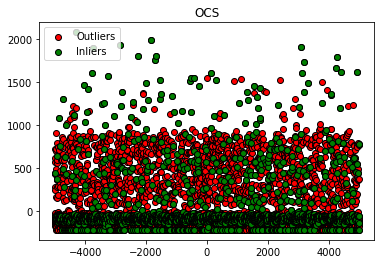

In [31]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("OCS")
plt.scatter(X_pca[:,0], X_pca[:,1], color='r',edgecolors='black',label="Outliers")
plt.scatter(values[:,0],values[:,1], color='green', edgecolors='black',label="Inliers")
plt.legend(loc="upper left")
plt.show()